# **Estimation of Obesity Levels Based On Eating Habits and Physical Condition**


This project presents a machine learning approach to a multiclass classification problem. The goal is to classify each individual in the dataset into one of seven obesity levels, ranging from insufficient weight to obesity type III, based on the target variable "NObeyesdad".
The dataset consists of 2,111 instances (individuals) from Mexico, Peru, and Colombia, described by 17 features related to lifestyle habits and physical conditions. These features include dietary patterns, physical activity, and other health-related attributes that may influence the obesity level.


**Where to get the dataset**

This dataset is available in the **UC Irvine Machine Learning Repository**:

[Estimation of Obesity Levels Based On Eating Habits and Physical Condition](https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition).

More information about the creation of the dataset can be found in this [article](https://doi.org/10.1016/j.dib.2019.104344).


**Dataset overview**

* Number of instances: 2111
* Number of features: 16 + 1 target
* Target variable:
| ID | Outcome               |
|--------|---------------------------|
| 0      | Insufficient Weight       |
| 1      | Normal Weight             |
| 2      | Overweight Level I        |
| 3      | Overweight Level II       |
| 4      | Obesity Type I            |
| 5      | Obesity Type II           |
| 6      | Obesity Type III          |

**Variables Description**:

**1. Gender** – Biological sex of the individual.

**2. Age** – Age of the individual (14–61 years).

**3. Height** – Height of the individual in meters.

**4. Weight** – Weight of the individual in kilograms.

**5. Family history with overweight** – Binary variable indicating whether any family member has suffered or suffers from overweight.

**6. FAVC (Frequent consumption of high caloric food)** – Frequency of consuming high-calorie foods.

**7. FCVC (Frequency of consumption of vegetables)** – Frequency of consuming vegetables.

**8. NCP (Number of main meals)**  – Number of main meals consumed daily.

**9. CAEC (Consumption of food between meals)** – Indicates whether the individual eats between main meals.

**10. SMOKE** – Indicates whether the individual smokes.

**11. CH2O(Consumption of water daily)** – Daily water consumption in liters.

**12. SCC (Calories consumption monitoring)** – Indicates whether the individual monitors calorie intake.

**13. FAF (Physical activity frequency)** – Frequency of physical activity or exercise.

**14. TUE (Time using technology devices)** – Daily time spent using technology devices.

**15. CALC (Consumption of alcohol)** – Indicates whether the individual consumes alcohol.

**16. MTRANS(Transportation used)** – Main mode of transportation used (bike, motorbike, walking, automobile, public transportation).

**17. NObeyesdad** – Classification of the individual’s obesity level.


**Dataset Composition**

It is important to note that only 23% of the records originate from real survey data, while the remaining 77% were synthetically generated using the SMOTE technique in order to balance the classes. This means that the dataset does not perfectly reflect real-world distributions of obesity levels, but rather provides a balanced and controlled scenario for testing and comparing classification algorithms.

## **0. Setup**

In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, label_binarize
from sklearn.feature_selection import SelectKBest, f_classif, RFE

# Model selection & evaluation
from sklearn.model_selection import (
    train_test_split,
    KFold,
    StratifiedKFold,
    GridSearchCV,
    cross_val_score
)
from sklearn.metrics import (
    accuracy_score,
    log_loss,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc
)
from sklearn.utils.multiclass import type_of_target

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


##**1. Data Loading and Exploration**

In [ ]:
# Load the obesity dataset CSV file into a pandas DataFrame
my_file = 'ObesityDataSet.csv'
obesity = pd.read_csv(my_file)

In [ ]:
obesity

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
print(obesity.shape)

(2111, 17)


In [ ]:
obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [ ]:
# Count unique values per column to identify categorical variables
obesity.nunique()

,0
Gender,2
Age,1402
Height,1574
Weight,1525
family_history_with_overweight,2
FAVC,2
FCVC,810
NCP,635
CAEC,4
SMOKE,2


In [ ]:
# Count missing values in each column
obesity.isnull().sum()


,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [ ]:
print(obesity.describe())

               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75% 

## **2. Exploratory Data Analysis**

In [ ]:
obesity_levels= obesity.groupby('NObeyesdad').size()
print(obesity_levels)

NObeyesdad
Insufficient_Weight    272
Normal_Weight          287
Obesity_Type_I         351
Obesity_Type_II        297
Obesity_Type_III       324
Overweight_Level_I     290
Overweight_Level_II    290
dtype: int64


As already mentioned, this dataset is not representative of a real-world scenario. In fact, 77% of the records were generated synthetically using SMOTE in order to balance the classes and make the dataset suitable for testing multiclass classification methods under controlled conditions. This step was necessary because, in real settings, the classes are highly imbalanced, and models often tend to predict only the dominant class, so the results may be optimistic compared to real-world data.

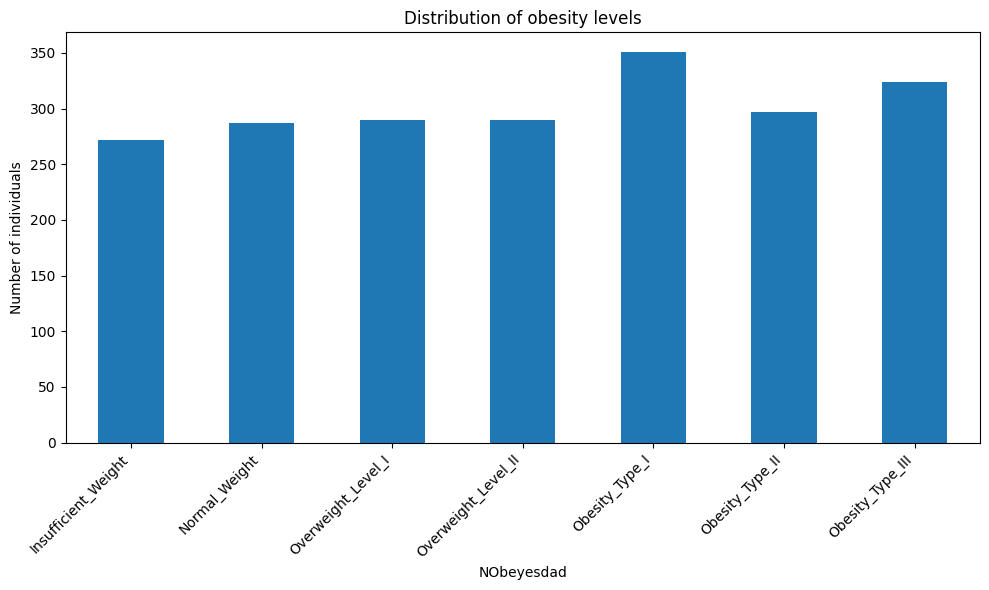

In [ ]:
obesity_levels = obesity.groupby('NObeyesdad').size()
labels_order = [
    "Insufficient_Weight",
    "Normal_Weight",
    "Overweight_Level_I",
    "Overweight_Level_II",
    "Obesity_Type_I",
    "Obesity_Type_II",
    "Obesity_Type_III"
]
obesity_levels = obesity_levels.reindex(labels_order)
obesity_levels.plot(kind="bar", figsize=(10,6))

plt.ylabel("Number of individuals")
plt.title("Distribution of obesity levels")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [ ]:
numeric_cols = obesity.select_dtypes(include=['int64', 'float64'])
skew = numeric_cols.skew()
print(skew)

Age       1.529100
Height   -0.012855
Weight    0.255410
FCVC     -0.432906
NCP      -1.107097
CH2O     -0.104912
FAF       0.498490
TUE       0.618502
dtype: float64


These features show multiple degrees of skewness. Age has the highest positive skew, indicating that most values are concentrated on the lower end, with a tail extending to higher ages. Weight, FAF, and TUE also have positive skew, but the values are lower and close to zero, suggesting more symmetric distributions. Similarly, Height, FCVC, and CH2O have small negative skew, indicating slight left-leaning asymmetry. Finally, NCP shows a strong negative skew, meaning most values are high with a long tail toward lower values.

## Histograms

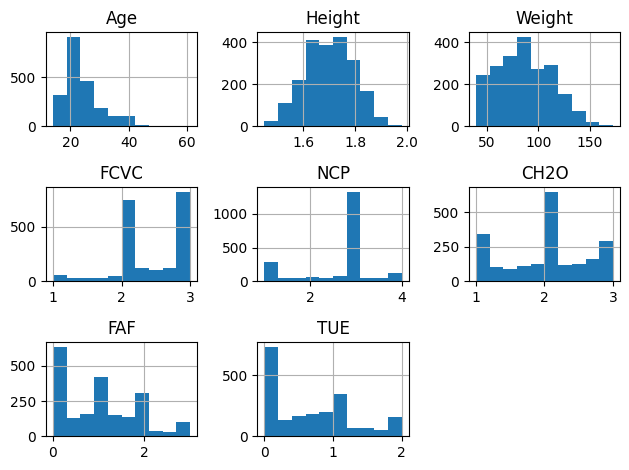

In [ ]:
obesity.hist()
plt.tight_layout()

Observing the histograms, we can see that most distributions, consistent with skewness values between ±0.5, are roughly symmetric. Variables with higher positive skewness (Age, FAF) show a long tail extending to the right, while those with negative skewness (FCVC) have a tail extending to the left. Even if NCP has a higher negative skew value, FCVC has a more pronounced (visible) left tail. This may be caused by the fact that skewness measures are influenced by extreme values, while the histogram reflects more the actual spread of the data. The histogram that most closely resembles a normal distribution is Height, which has a skewness value very close to 0.



## Density plot

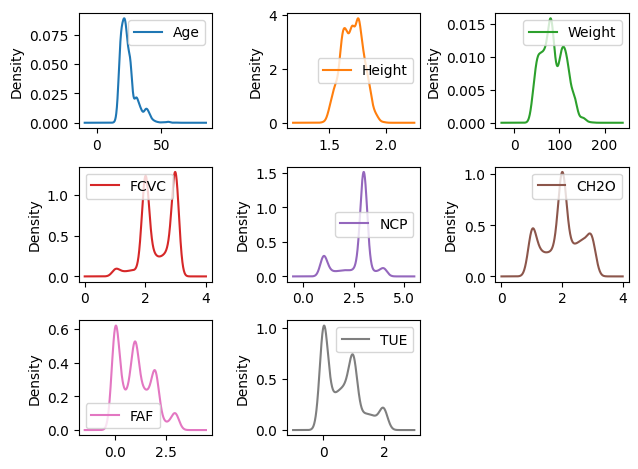

In [ ]:
obesity.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.tight_layout()
plt.show()

Consistently with the histograms, features with positive skew, like Age, display long tails extending to the right, whereas variables with negative skew, such as FCVC, show a left-leaning tail, even though it presents two major peaks. FAF shows multiple peaks, with the peaks becoming progressively lower towards the right, indicating that most observations are concentrated on the lower values while higher values are less frequent. Height remains the most symmetrical feature.

## Box plots

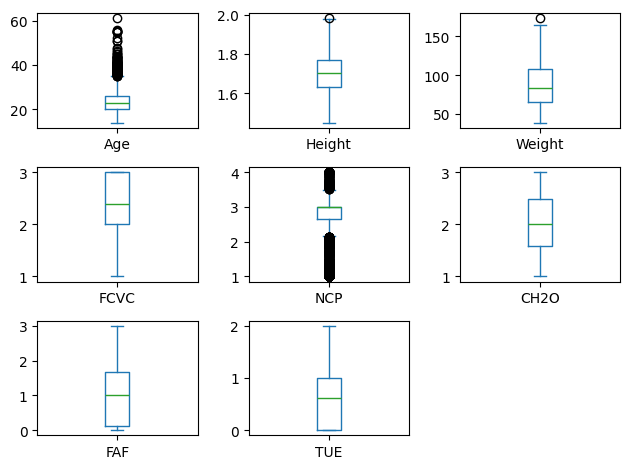

In [ ]:
obesity.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

From the box plots we observe that some features, such as Age and NCP, contain several outliers, while others like Height and CH2O appear more stable. Outliers were not removed in this study because they could be informative data points and removing them might risk losing important information; however, standardization was applied to place all features on a comparable scale.

In [ ]:
numeric_data = obesity.drop(columns=['Gender']).select_dtypes(include=['number'])
correlations = numeric_data.corr()
correlations

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,1.000000,-0.025958,0.202560,0.016291,-0.043944,-0.045304,-0.144938,-0.296931
Height,-0.025958,1.000000,0.463136,-0.038121,0.243672,0.213376,0.294709,0.051912
Weight,0.202560,0.463136,1.000000,0.216125,0.107469,0.200575,-0.051436,-0.071561
FCVC,0.016291,-0.038121,0.216125,1.000000,0.042216,0.068461,0.019939,-0.101135
NCP,-0.043944,0.243672,0.107469,0.042216,1.000000,0.057088,0.129504,0.036326
CH2O,-0.045304,0.213376,0.200575,0.068461,0.057088,1.000000,0.167236,0.011965
FAF,-0.144938,0.294709,-0.051436,0.019939,0.129504,0.167236,1.000000,0.058562
TUE,-0.296931,0.051912,-0.071561,-0.101135,0.036326,0.011965,0.058562,1.000000


## Correlation Matrix

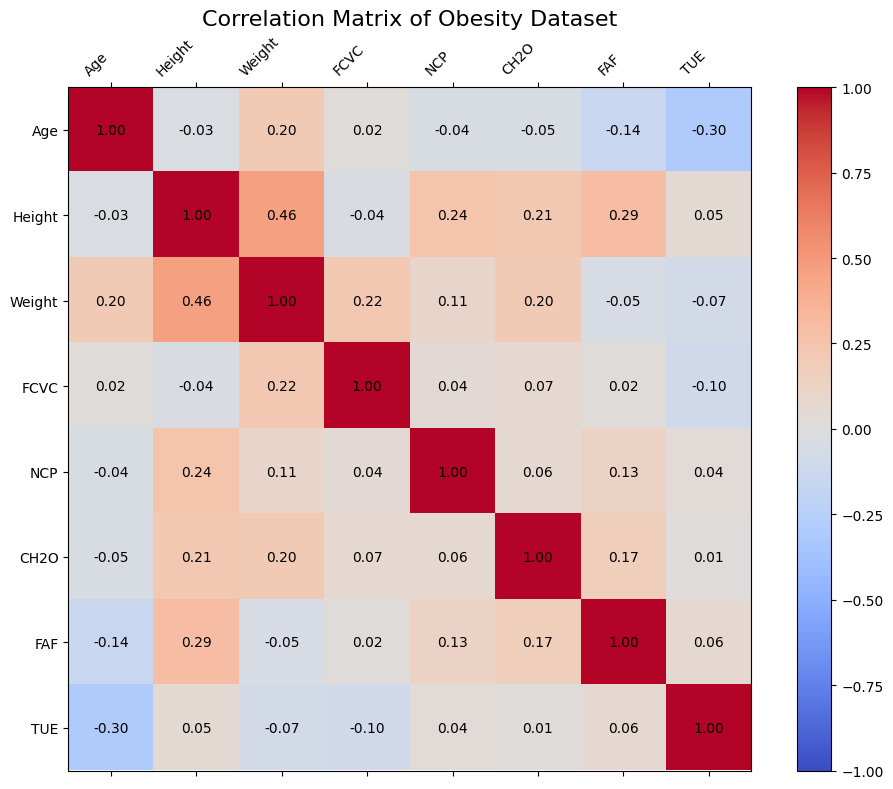


Top 3 Most Positively Correlated Variable Pairs:
      Var1    Var2  Correlation
10  Height  Weight     0.463136
49     FAF  Height     0.294709
12  Height     NCP     0.243672

Top 3 Most Negatively Correlated Variable Pairs:
    Var1 Var2  Correlation
7    Age  TUE    -0.296931
6    Age  FAF    -0.144938
31  FCVC  TUE    -0.101135


In [ ]:
names = numeric_data.columns  # column names

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

cax = ax.matshow(correlations, vmin=-1, vmax=1, cmap='coolwarm')
fig.colorbar(cax)
ticks = np.arange(len(names))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation=45, ha='right')
ax.set_yticklabels(names)

for i in range(len(names)):
    for j in range(len(names)):
        ax.text(j, i, f"{correlations.iloc[i,j]:.2f}", ha='center', va='center', color='black')

plt.title('Correlation Matrix of Obesity Dataset', fontsize=16)
plt.tight_layout()
plt.show()

corr_pairs = correlations.stack().reset_index()
corr_pairs.columns = ['Var1', 'Var2', 'Correlation']

corr_pairs = corr_pairs[corr_pairs['Var1'] < corr_pairs['Var2']]

# Top 3 positive correlations
top_pos = corr_pairs.sort_values('Correlation', ascending=False).head(3)

# Top 3 negative correlations
top_neg = corr_pairs.sort_values('Correlation', ascending=True).head(3)

print("\nTop 3 Most Positively Correlated Variable Pairs:")
print(top_pos)

print("\nTop 3 Most Negatively Correlated Variable Pairs:")
print(top_neg)


The correlation matrix shows that Height and Weight are the most positively correlated features, which is expected, as taller individuals generally tend to have higher body weight. There is also a moderate positive correlation between Height and Physical Activity Frequency (FAF), and between Height and the Number of Main Meals per Day (NCP), suggesting that taller individuals in this dataset may tend to be slightly more active and consume more meals.
On the other hand, the most negatively correlated features are Age and Time Using Technology Devices (TUE), followed by Age and FAF, and FCVC and TUE. The negative correlation between Age and TUE could reflect that older individuals spend less time on technology. Similarly, the slight negative correlation between Age and FAF may indicate that older participants are less physically active.

## **3. Data Preparation**

In this part of the pipeline, the dataset is first split into training and test sets, separating the features from the target variable. Preprocessing is then applied to the feature set: numerical features are standardized to ensure comparability, categorical features are encoded using one-hot encoding, and binary variables are mapped to 0 and 1.

In [ ]:
X = obesity.drop("NObeyesdad", axis=1)   # features
Y = obesity["NObeyesdad"]                # target
test_size = 0.33
seed = 2

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=test_size, random_state=seed
)

num_features = ["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"] # numerical
bin_features = ["family_history_with_overweight", "FAVC", "SMOKE", "SCC"] #binary
cat_features = ["Gender", "CAEC", "CALC", "MTRANS"] # categorical

for col in bin_features:
    X_train[col] = X_train[col].map({"no": 0, "yes": 1})
    X_test[col]  = X_test[col].map({"no": 0, "yes": 1})

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features), # scale numerical features
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features) # encode categorical features
    ],
    remainder="passthrough"
)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed  = preprocessor.transform(X_test)

num_cols = num_features
cat_cols = preprocessor.named_transformers_["cat"].get_feature_names_out(cat_features)
final_cols = list(num_cols) + list(cat_cols) + bin_features   # combine all feature names

# Convert processed arrays back to pandas DataFrames
X_train_proc = pd.DataFrame(X_train_processed, columns=final_cols)
X_test_proc  = pd.DataFrame(X_test_processed,  columns=final_cols)
X_train_proc
X_test_proc


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,family_history_with_overweight,FAVC,SMOKE,SCC
0,0.569912,1.307217,1.314266,1.110811,0.397277,1.588905,-0.412212,1.245905,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,-0.657309,1.213016,2.584496,1.110811,0.397277,0.638254,1.038130,0.444464,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,-0.984326,-0.913233,-1.213194,-0.766051,0.397277,-1.659736,-0.047000,0.562847,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,3.060145,-1.129240,-0.253793,-0.766051,0.397277,1.588905,-1.230329,-1.080952,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,-0.332729,0.142202,-0.179731,-0.766051,-1.991140,-0.485094,0.414688,0.718911,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,-1.069714,-1.129240,-0.829434,1.110811,-0.314120,-0.035415,-0.662813,1.747438,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
693,-0.517657,-0.913233,-0.637553,-0.766051,-2.188319,1.588905,-0.047000,-1.080952,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
694,-0.517657,1.246843,-0.560801,-2.642912,0.397277,1.588905,1.136329,-1.080952,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
695,-1.295439,-0.481218,-1.098066,-0.766051,-2.188319,-1.659736,-1.230329,0.562847,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


###**3.1 Feature selection**

Feature selection is applied on the training set using two different methods: SelectKBest (ANOVA F-test) and Recursive Feature Elimination (RFE). The goal is to identify the most informative features and determine which features are consistently selected by both methods. This allows the creation of a smaller dataset containing only the most relevant variables.

In [ ]:
def feature_selection(method, X_train, Y_train): # feature selection using either SelectKBest (ANOVA F-test) or RFE
    model = LogisticRegression(solver='lbfgs', max_iter=500)
    mean_list = [] # to store (k, mean_score, selected_features)
    if method == "SelectKBest":
      for k in range (5, len(X_train_proc.columns) + 1):
        selector = SelectKBest(score_func=f_classif, k=k)
        X_trained = selector.fit_transform(X_train, Y_train)
        selected_features = X_train.columns[selector.get_support()]
        # Evaluate model accuracy with cross-validation
        scores = cross_val_score(model, X_trained, Y_train, cv=5, scoring='accuracy')
        mean_score = scores.mean()
        mean_list.append((k, mean_score, list(selected_features)))

    elif method == "RFE":
      for k in range (5, len(X_train_proc.columns) + 1):
        selector = RFE(estimator=model, n_features_to_select=k)
        X_trained = selector.fit_transform(X_train, Y_train)
        selected_features = X_train.columns[selector.support_]
        scores = cross_val_score(model, X_trained, Y_train, cv=5, scoring='accuracy')
        mean_score = scores.mean()
        mean_list.append((k, mean_score, list(selected_features)))

    else:
      raise ValueError ("Invalid method! Choose between SelectKBest or RFE")

    # Find the K with the highest mean cross-validation accuracy
    max_acc = 0
    best_k = 0
    best_features = []

    for k, mean, feat in mean_list:
        if mean > max_acc:
            max_acc = mean
            best_k = k
            best_features = feat


    return max_acc, best_k, best_features


SelectKBest = feature_selection("SelectKBest", X_train_proc, Y_train)
print("The best K value, accuracy and features using SelectKBest are: \n")
print("Best K:", SelectKBest[1])
print("Accuracy of:", SelectKBest[0])
print("Selected features:", SelectKBest[2])
print("\n")

RFE = feature_selection("RFE", X_train_proc, Y_train)
print("The best K value, accuracy and features using RFE are: \n")
print("Best K:", RFE[1])
print("Accuracy of:", RFE[0])
print("Selected features:", RFE[2])

The best K value, accuracy and features using SelectKBest are: 

Best K: 12
Accuracy of: 0.8684459815051501
Selected features: ['Age', 'Height', 'Weight', 'FCVC', 'Gender_Female', 'Gender_Male', 'CAEC_Frequently', 'CAEC_Sometimes', 'CALC_Sometimes', 'CALC_no', 'family_history_with_overweight', 'FAVC']


The best K value, accuracy and features using RFE are: 

Best K: 7
Accuracy of: 0.8932035185324413
Selected features: ['Height', 'Weight', 'FCVC', 'Gender_Female', 'Gender_Male', 'CAEC_no', 'CALC_Sometimes']


In [ ]:
# features in common between RFE and SelectKBest
common_features = []

for feature in RFE[2]:
  if feature in SelectKBest[2]:
    common_features.append(feature)
print(common_features)

# creation of train and test sets with only common features
X_train_common = X_train_proc[common_features]
X_test_common  = X_test_proc[common_features]

X_train_common


['Height', 'Weight', 'FCVC', 'Gender_Female', 'Gender_Male', 'CALC_Sometimes']


,Height,Weight,FCVC,Gender_Female,Gender_Male,CALC_Sometimes
0,-1.263748,-0.402458,-0.766051,1.0,0.0,1.0
1,-1.070875,-0.705613,-0.766051,0.0,1.0,1.0
2,-0.336557,-0.238431,-0.766051,0.0,1.0,0.0
3,0.548242,-0.168261,-0.872788,0.0,1.0,1.0
4,-0.790843,0.967714,1.110811,1.0,0.0,1.0
...,...,...,...,...,...,...
1409,-1.982384,-0.749492,0.160083,1.0,0.0,0.0
1410,-0.697225,-1.059690,-0.766051,1.0,0.0,1.0
1411,-1.475058,-1.714601,-0.632861,1.0,0.0,1.0
1412,-0.552165,-0.442203,0.671693,1.0,0.0,1.0


## **4. Baseline Model Training and Evaluation**

In this step, the Logistic Regression (LR) model is trained and its performance is evaluated using cross-validation on both the full dataset and the feature-selected dataset. Accuracy is then compared to determine whether feature selection improves model performance.

In [ ]:
%%time
seed = 2
num = 10

kfold = StratifiedKFold(n_splits=num, random_state=seed, shuffle=True)
model = LogisticRegression(solver='lbfgs', max_iter=300)
results = cross_val_score(model, X_train_proc, Y_train, cv=kfold)

print(f"Accuracy: {results.mean() * 100:.2f}% ± {results.std() * 100:.2f}%")

Accuracy: 86.21% ± 2.14%
CPU times: user 1.88 s, sys: 5.99 ms, total: 1.89 s
Wall time: 974 ms


In [ ]:
%%time
seed = 2
num = 10

kfold = StratifiedKFold(n_splits=num, random_state=seed, shuffle=True)
model = LogisticRegression(solver='lbfgs', max_iter=500)
results = cross_val_score(model, X_train_common, Y_train, cv=kfold)

print(f"Splits: {num} → Accuracy: {results.mean() * 100:.2f}% ± {results.std() * 100:.2f}%")

Splits: 10 → Accuracy: 89.32% ± 1.62%
CPU times: user 1.06 s, sys: 2.01 ms, total: 1.06 s
Wall time: 540 ms


The model trained on the dataset with selected features achieved higher accuracy and roughly halved total CPU time compared to the model trained on the full dataset. Therefore, the dataset containing only the selected features is used in all subsequent steps.

## **5. Model Comparison and Selection**

In this comparison, six different machine learning classifiers are evaluated on the training set with selected features:
* Logistic Regression (LR)
* Linear Discriminant Analysis (LDA)
* K-Nearest Neighbors (KNN)
* Decision Tree (CART)
* Gaussian Naive Bayes (NB)
* Support Vector Machine (SVM)

Each model is evaluated using Stratified 10-Fold Cross-Validation to ensure fair comparison and preserve class proportions in each fold.

In [ ]:
%%time

models = []
models.append(( 'LR'   , LogisticRegression(solver='lbfgs', max_iter=500)))
models.append(( 'LDA'  , LinearDiscriminantAnalysis()))
models.append(( 'KNN'  , KNeighborsClassifier()))
models.append(( 'CART' , DecisionTreeClassifier()))
models.append(( 'NB'   , GaussianNB()))
models.append(( 'SVM' , SVC()))

res = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=7, shuffle=True)
  cv_results = cross_val_score(model, X_train_common, Y_train, cv=kfold, scoring=scoring)
  res.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.898851 (0.029090)
LDA: 0.893197 (0.031131)
KNN: 0.880442 (0.023109)
CART: 0.943422 (0.007075)
NB: 0.577075 (0.043164)
SVM: 0.923599 (0.022425)
CPU times: user 1.96 s, sys: 6 ms, total: 1.97 s
Wall time: 1.37 s


CART achieved the highest mean accuracy, followed by SVM and LR. CART and SVM also showed low standard deviations, indicating stable performance. NB performed worst, likely due to the independence assumption being violated.

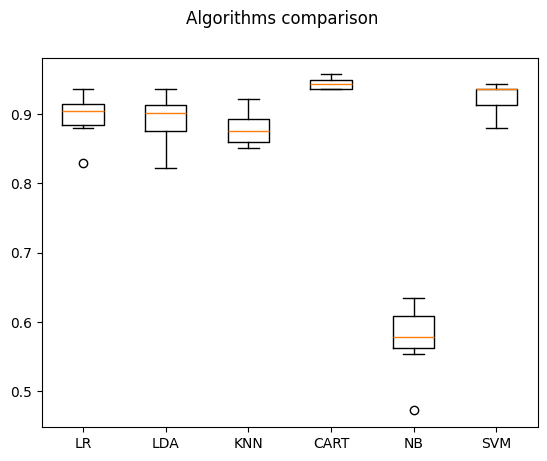

In [ ]:
# boxplot algorithms comparison
fig = plt.figure()
fig.suptitle('Algorithms comparison')
ax = fig.add_subplot(111)
plt.boxplot(res)
ax.set_xticklabels(names)
plt.show()

In [ ]:
# Define models to compare
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=500)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(probability=True)))

results = {}
kfold = StratifiedKFold(n_splits=10, random_state=7, shuffle=True)

# Differentiate binary and multiclass target to choose correct AUC metric
target_type = type_of_target(Y_train)
if target_type == "binary":
    auc_metric = "roc_auc"
else:
    auc_metric = "roc_auc_ovr"

print(f"\n Using AUC metric: {auc_metric}\n")


for name, model in models:

    # Accuracy
    cv_acc = cross_val_score(model, X_train_common, Y_train, cv=kfold, scoring='accuracy')
    mean_acc = cv_acc.mean()

    # Log Loss
    cv_logloss = cross_val_score(model, X_train_common, Y_train, cv=kfold, scoring='neg_log_loss')
    mean_logloss = -cv_logloss.mean()

    # AUC
    try:
        cv_auc = cross_val_score(model, X_train_common, Y_train, cv=kfold, scoring=auc_metric)
        mean_auc = cv_auc.mean()
    except Exception as e:
        print(f"  {name} doesn't support {auc_metric}: {e}")
        mean_auc = np.nan

    results[name] = {
        "Accuracy": mean_acc,
        "LogLoss": mean_logloss,
        "AUC": mean_auc
    }

    print(name + ":")
    print(f"Accuracy: {mean_acc:.4f}")
    print(f"LogLoss: {mean_logloss:.4f}")
    print(f"AUC: {mean_auc:.4f}")
    print("\n")

summary = pd.DataFrame(results).T
summary = summary.sort_values("AUC", ascending=False)
print("\n Summary of models (mean CV scores):")
print(summary)



 Using AUC metric: roc_auc_ovr

LR:
Accuracy: 0.8989
LogLoss: 0.5048
AUC: 0.9877


LDA:
Accuracy: 0.8932
LogLoss: 0.3127
AUC: 0.9912


KNN:
Accuracy: 0.8804
LogLoss: 1.0963
AUC: 0.9772


CART:
Accuracy: 0.9484
LogLoss: 2.2679
AUC: 0.9656


NB:
Accuracy: 0.5771
LogLoss: 2.7704
AUC: 0.8724


SVM:
Accuracy: 0.9236
LogLoss: 0.1915
AUC: 0.9957



 Summary of models (mean CV scores):
      Accuracy   LogLoss       AUC
SVM   0.923599  0.191537  0.995684
LDA   0.893197  0.312657  0.991219
LR    0.898851  0.504849  0.987697
KNN   0.880442  1.096307  0.977213
CART  0.948377  2.267895  0.965552
NB    0.577075  2.770367  0.872370


CART achieves the highest accuracy, but its very large log loss indicates that its probability estimates are poorly calibrated. SVM also shows strong accuracy and the highest AUC, with reasonably low log loss, suggesting both accurate predictions and reliable probabilities. LDA combines solid accuracy with a comparatively low log loss, closely followed by Logistic Regression. Based on these results, hyperparameter tuning will be applied to these four models to evaluate whether their performance can be further improved.

### **5.1 Hyperparameter optimization**

In [ ]:
tuned_models = {}

# CART hyperparameters
cart_param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
cart = DecisionTreeClassifier()
cart_grid = GridSearchCV(cart, cart_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
cart_grid.fit(X_train_common, Y_train)
tuned_models['CART'] = cart_grid.best_estimator_

# SVM hyperparameters
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
svm = SVC(probability=True)
svm_grid = GridSearchCV(svm, svm_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid.fit(X_train_common, Y_train)
tuned_models['SVM'] = svm_grid.best_estimator_

# LR hyperparameters
lr_param_grid = [
    {'solver': ['liblinear'], 'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'solver': ['lbfgs'], 'penalty': ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
]
lr = LogisticRegression(max_iter=1000)
lr_grid = GridSearchCV(lr, lr_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
lr_grid.fit(X_train_common, Y_train)
tuned_models['LR'] = lr_grid.best_estimator_

# LDA hyperparameters
lda_param_grid = [
    {'solver': ['svd']},
    {'solver': ['lsqr'], 'shrinkage': ['auto']},
    {'solver': ['eigen'], 'shrinkage': ['auto']}
]

lda = LinearDiscriminantAnalysis()
lda_grid = GridSearchCV(lda, lda_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
lda_grid.fit(X_train_common, Y_train)
tuned_models['LDA'] = lda_grid.best_estimator_


In [ ]:
tuned_models = {
    "CART": cart_grid.best_estimator_,
    "SVM": svm_grid.best_estimator_,
    "LR": lr_grid.best_estimator_,
    "LDA": lda_grid.best_estimator_
}

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)

# scorer for LogLoss
def logloss_scorer(estimator, X, y):
    if hasattr(estimator, "predict_proba"):
        y_proba = estimator.predict_proba(X)
        return -log_loss(y, y_proba)
    else:
        return np.nan  # if the model does not support predict_proba

# Detect binary vs multiclass target for AUC
from sklearn.utils.multiclass import type_of_target
target_type = type_of_target(Y_train)
auc_metric = "roc_auc" if target_type == "binary" else "roc_auc_ovr"

# Evaluate tuned models
for name, model in tuned_models.items():
    print(f"\n{name} (post-tuning):")

    # Accuracy CV
    cv_acc = cross_val_score(model, X_train_common, Y_train, cv=kfold, scoring='accuracy')

    # LogLoss CV
    cv_ll = cross_val_score(model, X_train_common, Y_train, cv=kfold, scoring=logloss_scorer)

    # AUC CV
    try:
        cv_auc = cross_val_score(model, X_train_common, Y_train, cv=kfold, scoring=auc_metric)
        mean_auc, std_auc = cv_auc.mean(), cv_auc.std()
    except Exception:
        mean_auc, std_auc = np.nan, np.nan

    print(f"Accuracy: {cv_acc.mean():.4f} ± {cv_acc.std():.4f} ")
    print(f"LogLoss: {cv_ll.mean():.4f} ± {cv_ll.std():.4f} ")
    print(f"AUC: {mean_auc:.4f} ± {std_auc:.4f}  ")


CART (post-tuning):
Accuracy: 0.9364 ± 0.0184 
LogLoss: -2.0781 ± 0.5248 
AUC: 0.9662 ± 0.0077  

SVM (post-tuning):
Accuracy: 0.9646 ± 0.0100 
LogLoss: -0.1141 ± 0.0172 
AUC: 0.9989 ± 0.0008  

LR (post-tuning):
Accuracy: 0.9675 ± 0.0132 
LogLoss: -0.1368 ± 0.0425 
AUC: 0.9984 ± 0.0011  

LDA (post-tuning):
Accuracy: 0.8932 ± 0.0311 
LogLoss: -0.3127 ± 0.0337 
AUC: 0.9912 ± 0.0032  


After hyperparameter tuning, Logistic Regression (LR) achieves the highest accuracy, closely followed by SVM. Interestingly, CART shows slightly lower accuracy than before tuning, and its very high log loss indicates poorly calibrated probability estimates. LDA's performance remains largely unchanged. Both SVM and LR exhibit low log loss, while SVM has a marginally higher AUC. Considering both predictive performance and model interpretability, LR was selected as the final model for evaluation on the test set, due to its simplicity and ease of interpretation compared to SVM.

##**6. Model Evaluation on the Test Set**

Logistic Regression has been chosen as the final model, and its performance (measured through Accuracy, Log Loss, AUC, and the confusion matrix) will be evaluated on the test set.

In [ ]:
final_model = lr_grid.best_estimator_
final_model.fit(X_train_common, Y_train)
Y_pred = final_model.predict(X_test_common)
y_proba= final_model.predict_proba(X_test_common)

LR:
Accuracy: 0.9598
LogLoss: 0.1384
AUC: 0.9983

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.94      1.00      0.97        88
      Normal_Weight       0.99      0.91      0.95       101
 Overweight_Level_I       0.94      0.91      0.92        85
Overweight_Level_II       0.92      0.97      0.94        93
     Obesity_Type_I       0.96      0.98      0.97       108
    Obesity_Type_II       0.97      0.96      0.97       109
   Obesity_Type_III       0.99      0.98      0.99       113

           accuracy                           0.96       697
          macro avg       0.96      0.96      0.96       697
       weighted avg       0.96      0.96      0.96       697



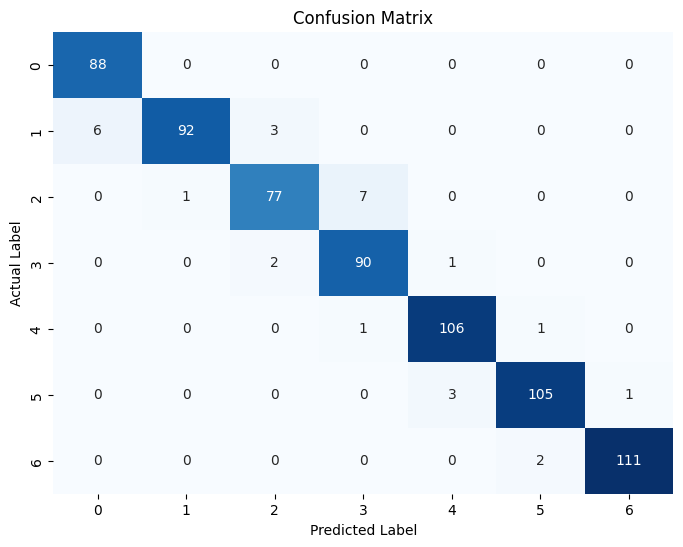

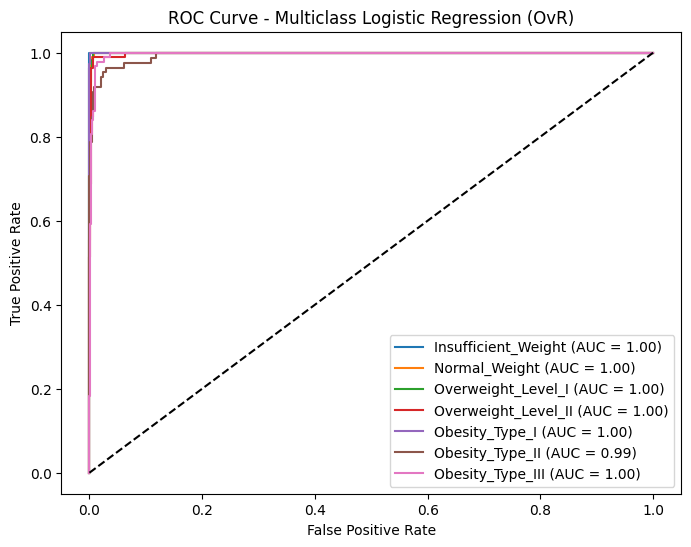

In [ ]:
acc = accuracy_score(Y_test, Y_pred) # overall accuracy
ll = log_loss(Y_test, y_proba)       # Log loss
try:
    area_u_c = roc_auc_score(Y_test, y_proba, multi_class='ovr')  # Multiclass AUC (One-vs-Rest)
except:
    area_u_c = np.nan

cm = confusion_matrix(Y_test, Y_pred, labels = labels_order)  # confusion matrix
cr = classification_report(Y_test, Y_pred, labels = labels_order)  # Precision, recall, f1-score per class

print("LR:")
print(f"Accuracy: {acc:.4f}")
print(f"LogLoss: {ll:.4f}")
print(f"AUC: {area_u_c:.4f}")
print("\nClassification Report:")
print(cr)


# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
Y_test_bin = label_binarize(Y_test, classes=tuned_models['LR'].classes_)
y_score = tuned_models['LR'].predict_proba(X_test_common)

plt.figure(figsize=(8,6))

for i, class_label in enumerate(labels_order):
    fpr, tpr, _ = roc_curve(Y_test_bin[:, i], y_score[:, i])  # Compute FPR and TPR
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{class_label} (AUC = {roc_auc:.2f})")

# diagonal line
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Multiclass Logistic Regression (OvR)")
plt.legend()
plt.show()


The final Logistic Regression model shows excellent performance on the test set, with high accuracy (95.98%), low Logloss (0.1384), and nearly perfect multiclass AUC values (0.9983). Regarding the classification report, most classes achieve high precision, recall, and F1-scores above 0.90, particularly ‘Insufficient_Weight’, ‘Obesity_Type_I’, and ‘Obesity_Type_III’. The confusion matrix shows very few misclassifications, which mostly occur between adjacent categories, while the majority of samples are correctly classified. Overall, these results indicate that the model generalizes well to unseen data, accurately distinguishing between all seven weight categories.

